Import libraries

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('train.csv')
df.head()
#Displays the first five rows of the dataset for a quick overview.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df.describe()
#: Summarizes numerical columns with statistics like mean, median, standard deviation, min, and max values


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
df.info()
# Provides information about column data types and non-null counts, helping identify missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Basic Plotting


1.Boxplot

>Boxplot helps detect outliers (data points that are significantly different from others)
and shows the distribution's spread, median, and quartiles.

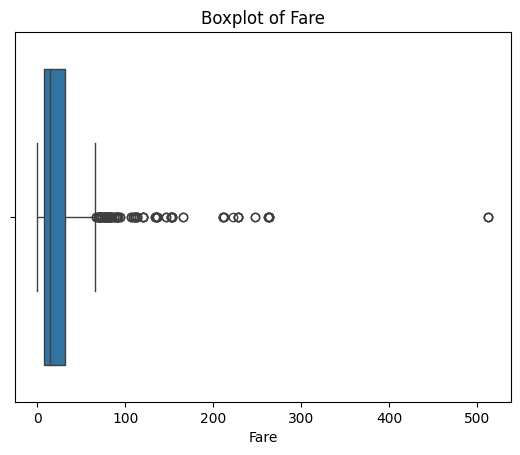

In [20]:

sns.boxplot(x= df["Fare"])
plt.title("Boxplot of Fare")
plt.xlabel("Fare")
plt.show()

2. Histplot

>Combines a histogram and a KDE curve to visualize the distribution of the numerical
data.
>Identifies skewness, modality, and overall spread of the data.

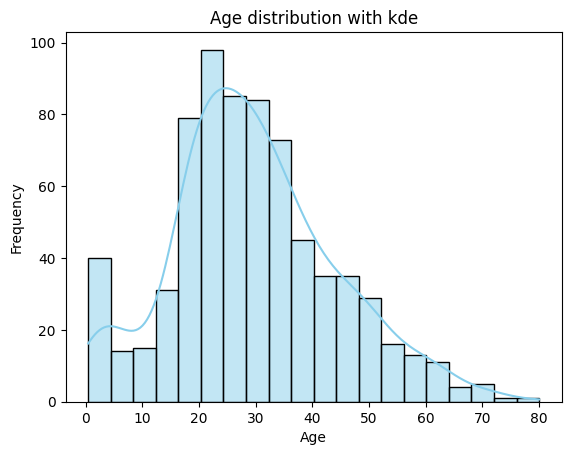

In [30]:
sns.histplot(df['Age'], kde=True, bins= 20, color='skyblue')
plt.title("Age distribution with kde")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

            

In [37]:
#numerical data filtering
df_n = df.select_dtypes(include = np.number)

3. Heatmap

>Heatmap shows pairwise correlations between numerical variables.
Highlights strong positive or negative relationships for further analysis

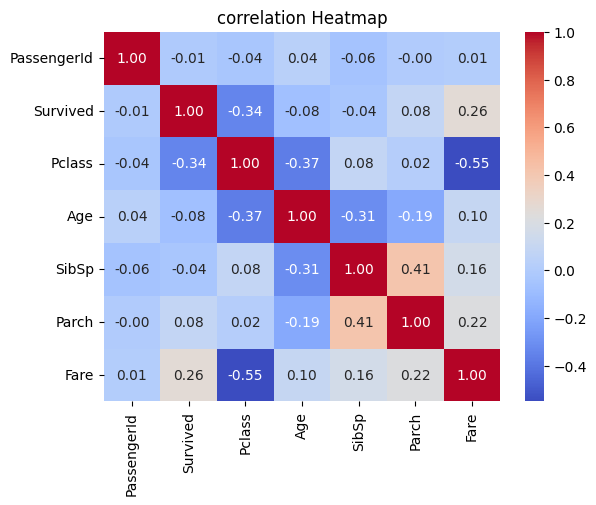

In [38]:
sns.heatmap(df_n.corr() , annot= True , cmap= 'coolwarm' , fmt = '.2f')
plt.title("correlation Heatmap")
plt.show()

4. Histogram

>Visualizes the frequency distribution of Age. Useful for identifying common age ranges and trends in passenger demographics

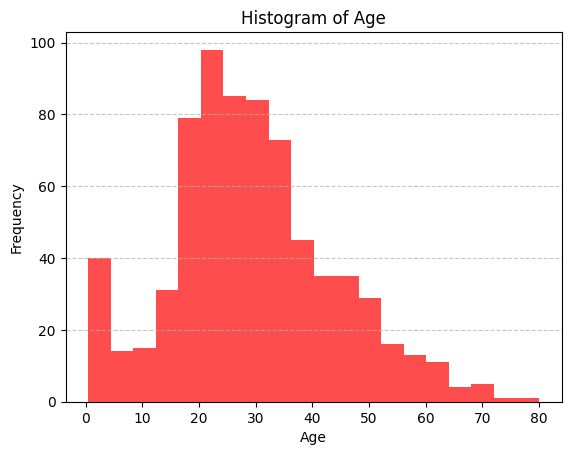

In [39]:
df['Age'].plot(kind='hist', bins=20, color = 'red' , alpha = 0.7)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y' , linestyle = '--' , alpha = 0.7 )
plt.show()

5. Pie chart
>Highlights proportions or percentages of passengers who survived versus those who did not.

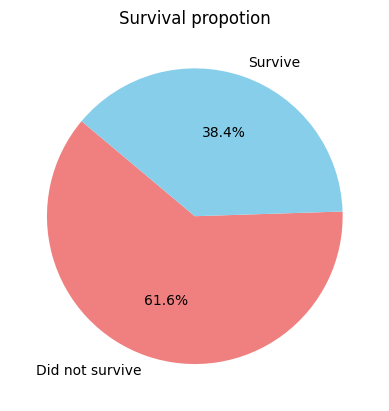

In [41]:
survival_counts = df['Survived'].value_counts()
labels =  ["Did not survive" , "Survive" ]
plt.pie(survival_counts,labels=labels , autopct='%1.1f%%',startangle = 140 , colors=['lightcoral' , 'skyblue'])
plt.title("Survival propotion")
plt.show()

Section 1: Univariate Analysis

Numerical Data
>Histograms visualize the frequency distribution, while boxplots detect outliers and show data spread.


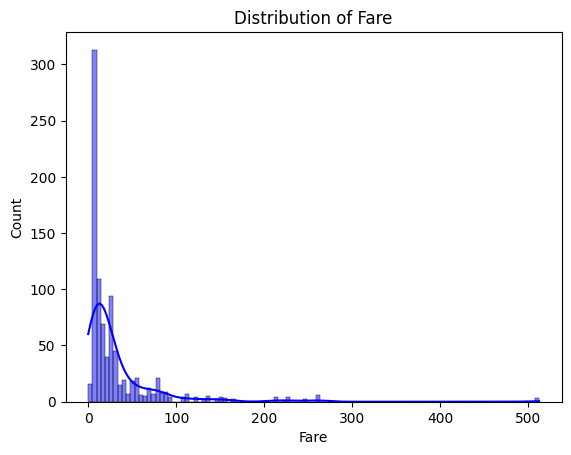

In [6]:
sns.histplot(df['Fare'], kde = True, color='blue')
plt.title('Distribution of Fare')
plt.show()

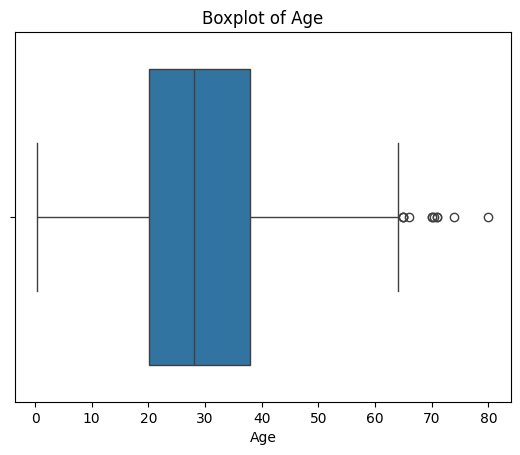

In [7]:
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age")
plt.show()

Categorical Data

>Countplots display the frequency of categorical variables like passenger class. Bar charts highlight the distribution of values across categories.

C:\Users\ahame\AppData\Local\Temp\ipykernel_13336\3493296044.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette='viridis')


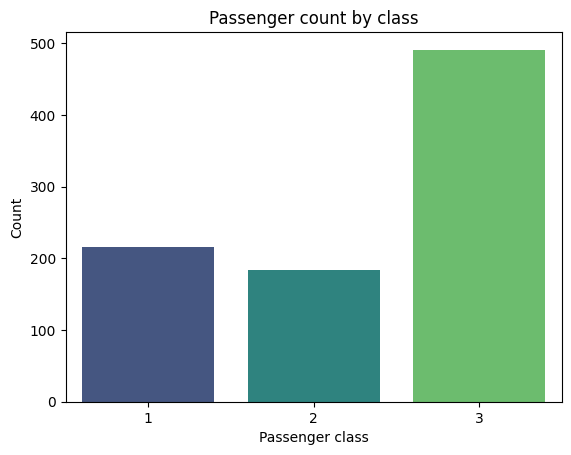

In [8]:
sns.countplot(x='Pclass', data=df, palette='viridis')
plt.title("Passenger count by class")
plt.xlabel('Passenger class')
plt.ylabel("Count")
plt.show()



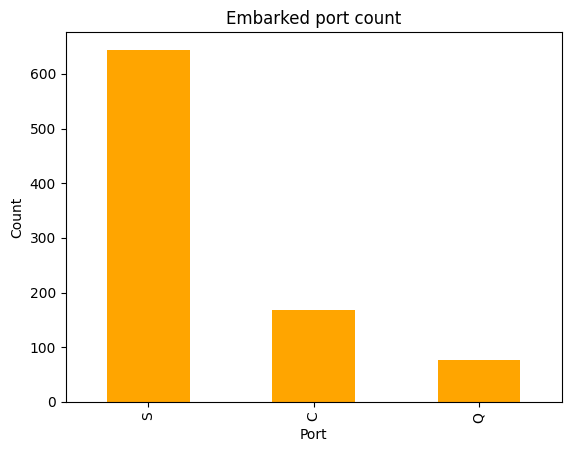

In [9]:
df['Embarked'].value_counts().plot(kind='bar',color='orange')
plt.title("Embarked port count")
plt.xlabel("Port")
plt.ylabel("Count")
plt.show()

Section 2: Bivariate Analysis

Numerical - Numerical
>Scatterplots highlight relationships between two numerical features.

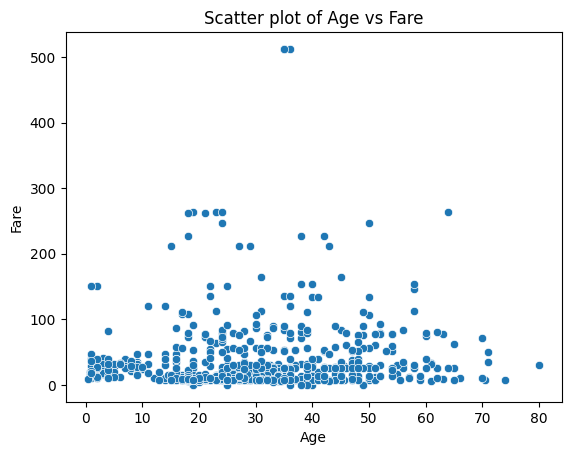

In [10]:
sns.scatterplot(x="Age", y = 'Fare', data=df)
plt.title("Scatter plot of Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

Numerical - Categorical
> Boxplots compare distributions (e.g., Age) across survival categories.


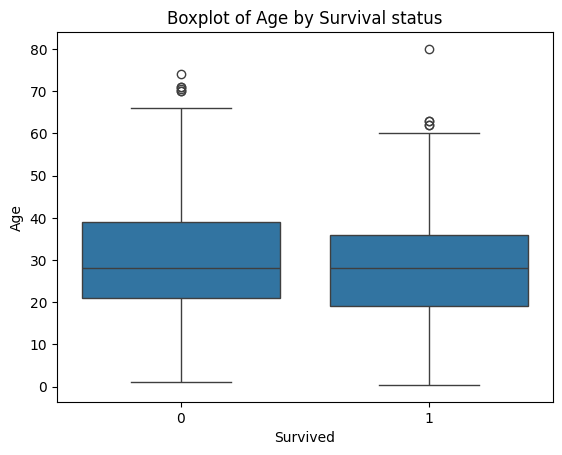

In [12]:
sns.boxplot(x="Survived", y = "Age", data = df)
plt.title("Boxplot of Age by Survival status")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

Section 3: Multivariate Analysis
>Pairplots allow simultaneous comparison of multiple features to detect relationships and patterns.

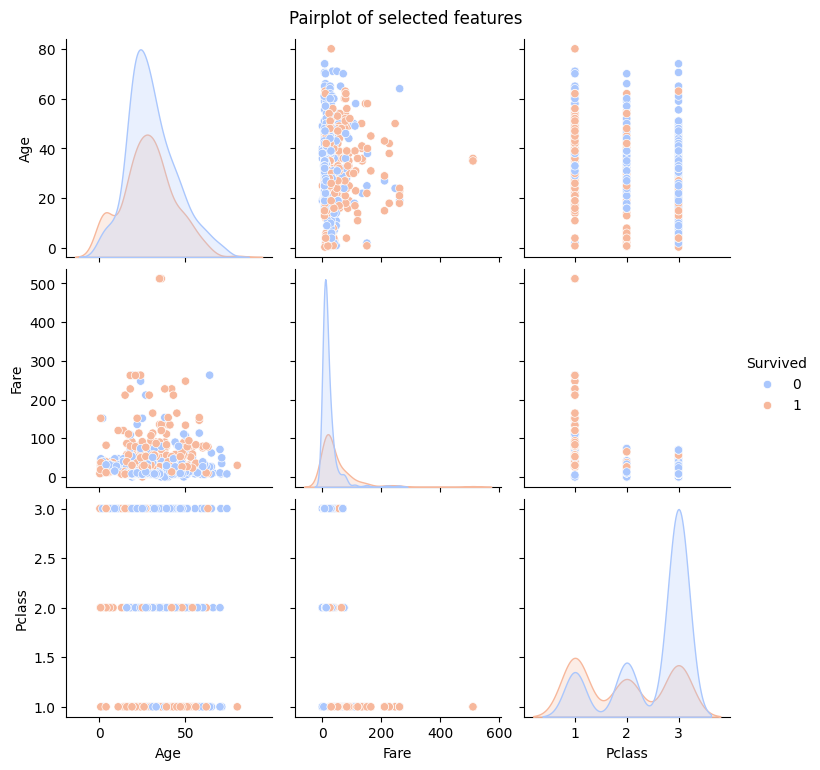

In [14]:
sns.pairplot(df[["Age", "Fare", "Pclass", "Survived"]], hue="Survived", palette = "coolwarm")
plt.suptitle("Pairplot of selected features", y = 1.02)
plt.show()